<div style="background-color:#004d40; color:#ffffff; padding:15px; border-radius:8px; font-size:24px; font-weight:bold; text-align:center;">
    Occupational Health and Safety: Fatality and Critical Injury Analysis
</div>


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Overview
</div>

This notebook analyzes occupational fatalities and critical injuries using data reported to the Ministry of Labour.  It aims to identify trends, assess sector-wise distributions, and uncover key insights to support data-driven workplace safety improvements and policy recommendations.

Dataset Information:
- **Fatalities Dataset (`fatalities.csv`)**: Contains annual fatalities across sectors.
- **Critical Injuries Dataset (`critical_injuries.csv`)**: Contains annual critical injuries across sectors.

- Data Source : https://data.ontario.ca/dataset/occupational-health-and-safety-worker-fatality-and-critical-injury-counts-report


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Load Libraries and Datasets
</div>


In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,kruskal,shapiro
from pymannkendall import original_test

# Define file paths 
fatalities_path = "fatalities.csv"
critical_injuries_path = "critical_injuries.csv"


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Fatality Dataset Exploration
</div>


In [265]:
# Load fatality dataset and Display first few rows
fatalities_df = pd.read_csv(fatalities_path)
fatalities_df

,_id,Calendar Year,Construction,Industrial,Health Care,Mining,Total
0,1,2011,22,28,0,5,55
1,2,2012,13,22,1,3,39
2,3,2013,21,41,0,3,65
3,4,2014,22,28,0,6,56
4,5,2015,18,30,1,4,53
5,6,2016,14,31,0,0,45
6,7,2017,22,27,0,5,54
7,8,2018,25,27,0,0,52
8,9,2019,18,26,0,1,45
9,10,2020,21,31,0,1,53


In [266]:
# Checking for missing values
print("Missing Values in Dataset:\n", fatalities_df.isnull().sum())

Missing Values in Dataset:
 _id              0
Calendar Year    0
Construction     0
Industrial       0
Health Care      0
Mining           0
Total            0
dtype: int64


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Critical Injury Dataset Exploration
</div>


In [267]:
# Load critical injury dataset and Display first few r
critical_injuries_df = pd.read_csv(critical_injuries_path)
critical_injuries_df

,_id,Calendar Year,Construction Health and Safety Program,Industrial Health and Safety Program,Health Care Program,Mining Health and Safety Program,Program Unassigned,Total
0,1,2011,180,598,26.0,31,131.0,966
1,2,2012,190,690,NaN,24,243.0,1147
2,3,2013,186,703,NaN,25,216.0,1130
3,4,2014,200,865,NaN,30,NaN,1095
4,5,2015,162,683,NaN,28,NaN,873
5,6,2016,172,727,NaN,29,NaN,928
6,7,2017,320,1543,NaN,35,NaN,1898
7,8,2018,324,1760,NaN,31,NaN,2115
8,9,2019,307,2050,NaN,41,NaN,2398
9,10,2020,360,1636,NaN,33,NaN,2029


In [268]:
# Checking for missing values
print("Missing Values in Dataset:\n", critical_injuries_df.isnull().sum())

Missing Values in Dataset:
 _id                                        0
Calendar Year                              0
Construction Health and Safety Program     0
Industrial Health and Safety Program       0
Health Care Program                        9
Mining Health and Safety Program           0
Program Unassigned                        10
Total                                      0
dtype: int64


Health Care Program has 9 missing values out of 13 years. Program Unassigned  is also having 10 missing values. Health care can be used for trend analysis of 2021,2022, and 2023 years, as we have data from those years.

<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Data Visualisations 
</div>


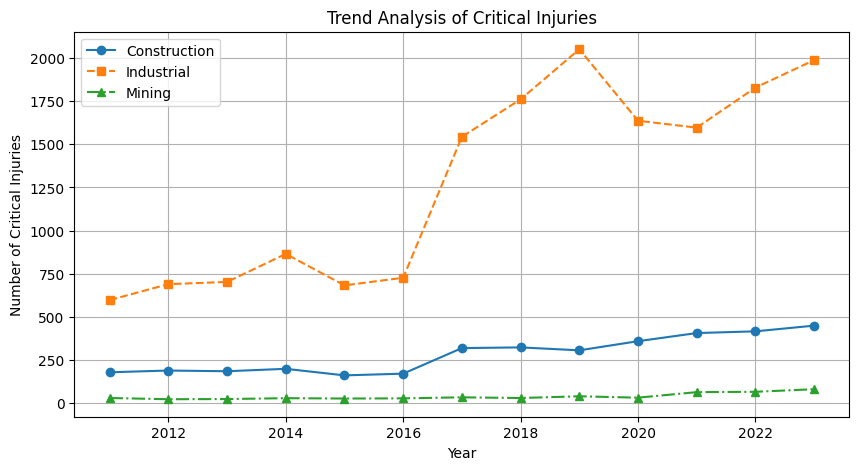

In [ ]:
# Select only columns without missing values
filtered_df = critical_injuries_df[["Calendar Year", 
                                    "Construction Health and Safety Program", 
                                    "Industrial Health and Safety Program", 
                                    "Mining Health and Safety Program", 
                                    "Total"]]

# Plot trends over time for selected columns
plt.figure(figsize=(10, 5))

plt.plot(filtered_df["Calendar Year"], filtered_df["Construction Health and Safety Program"], marker='o', label="Construction", linestyle='-')
plt.plot(filtered_df["Calendar Year"], filtered_df["Industrial Health and Safety Program"], marker='s', label="Industrial", linestyle='--')
plt.plot(filtered_df["Calendar Year"], filtered_df["Mining Health and Safety Program"], marker='^', label="Mining", linestyle='-.')
plt.xlabel("Year")
plt.ylabel("Number of Critical Injuries")
plt.title("Trend Analysis of Critical Injuries")
plt.legend()
plt.grid(True)
plt.show()


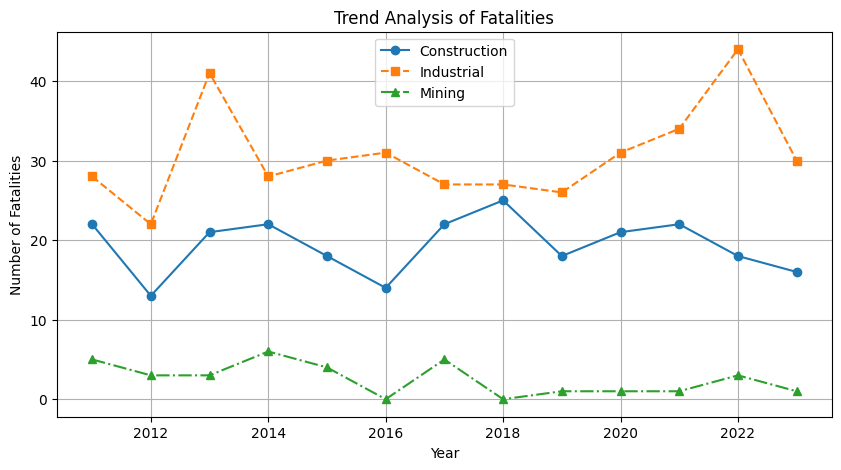

In [270]:
# Trend Analysis for Fatalities 
filtered_fatalities_df = fatalities_df[["Calendar Year", "Construction", "Industrial", "Mining", "Total"]]

plt.figure(figsize=(10, 5))
plt.plot(filtered_fatalities_df["Calendar Year"], filtered_fatalities_df["Construction"], marker='o', label="Construction", linestyle='-')
plt.plot(filtered_fatalities_df["Calendar Year"], filtered_fatalities_df["Industrial"], marker='s', label="Industrial", linestyle='--')
plt.plot(filtered_fatalities_df["Calendar Year"], filtered_fatalities_df["Mining"], marker='^', label="Mining", linestyle='-.')

plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.title("Trend Analysis of Fatalities")
plt.legend()
plt.grid(True)
plt.show()


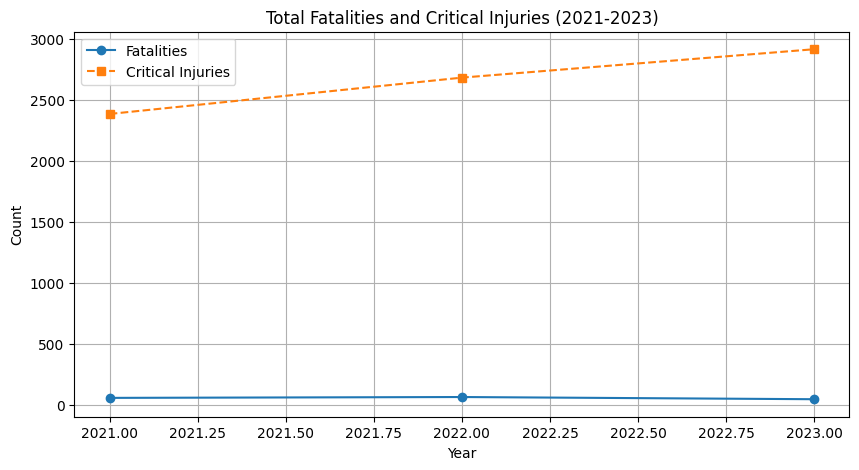

In [271]:
# Filter data for years 2021-2023
filtered_fatalities_df = fatalities_df[fatalities_df["Calendar Year"].isin([2021, 2022, 2023])]
filtered_critical_injuries_df = critical_injuries_df[critical_injuries_df["Calendar Year"].isin([2021, 2022, 2023])]

# Plot trend of total fatalities and critical injuries over time (2021-2023)
plt.figure(figsize=(10, 5))
plt.plot(filtered_fatalities_df["Calendar Year"], filtered_fatalities_df["Total"], marker='o', label="Fatalities", linestyle='-')
plt.plot(filtered_critical_injuries_df["Calendar Year"], filtered_critical_injuries_df["Total"], marker='s', label="Critical Injuries", linestyle='--')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Total Fatalities and Critical Injuries (2021-2023)")
plt.legend()
plt.grid(True)
plt.show()


X-axis: Represents the years 2021, 2022, and 2023.
Y-axis: Represents the count of fatalities (blue line) and critical injuries (orange dashed line).
Critical injuries show a consistent increasing trend, rising from around 2400 in 2021 to nearly 3000 in 2023.
Fatalities  remain relatively stable, with only minor fluctuations.
There is a significant difference between critical injuries and fatalities, with critical injuries being significantly higher.

The growing number of critical injuries is a concern and should be addressed through:
* Workplace safety audits to identify common causes.
* Improved safety protocols and stricter regulations in high-risk sectors.
* Training programs to prevent injuries before they become critical.
* Continued monitoring of fatalities and injuries is needed to ensure safety policies remain effective.

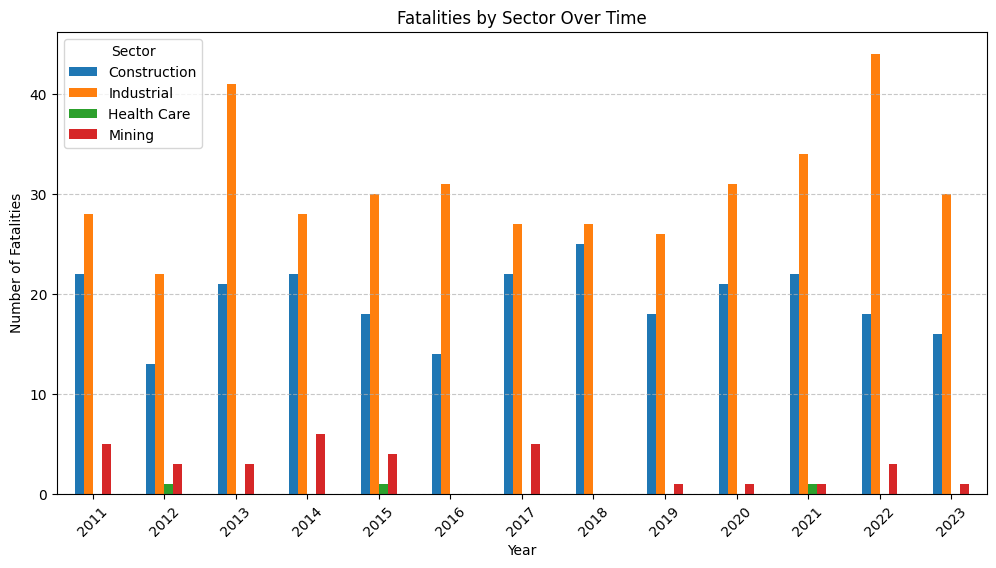

In [272]:

# Bar chart: Fatalities by sector over time
fatalities_df.set_index("Calendar Year")[["Construction", "Industrial", "Health Care", "Mining"]].plot(
    kind='bar', figsize=(12, 6), stacked=False
)
plt.title("Fatalities by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.legend(title="Sector")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The X-axis represents the years 2011 to 2023, while the Y-axis shows the number of fatalities recorded in different sectors.

Industrial sector fatalities peaked around 2013 and 2022, exceeding 40 deaths in some years, making it the most concerning sector in terms of workplace fatalities.
Construction sector fatalities remain relatively stable, fluctuating between 15 and 25 deaths per year, indicating persistent risks but no sharp increases.
Mining sector fatalities show some variability, but overall, the numbers remain lower compared to industrial and construction sectors.

Health care reported fatalities only in 2012, 2015, and 2021 (with a maximum of 1 fatality).
Not enough data to establish trends.

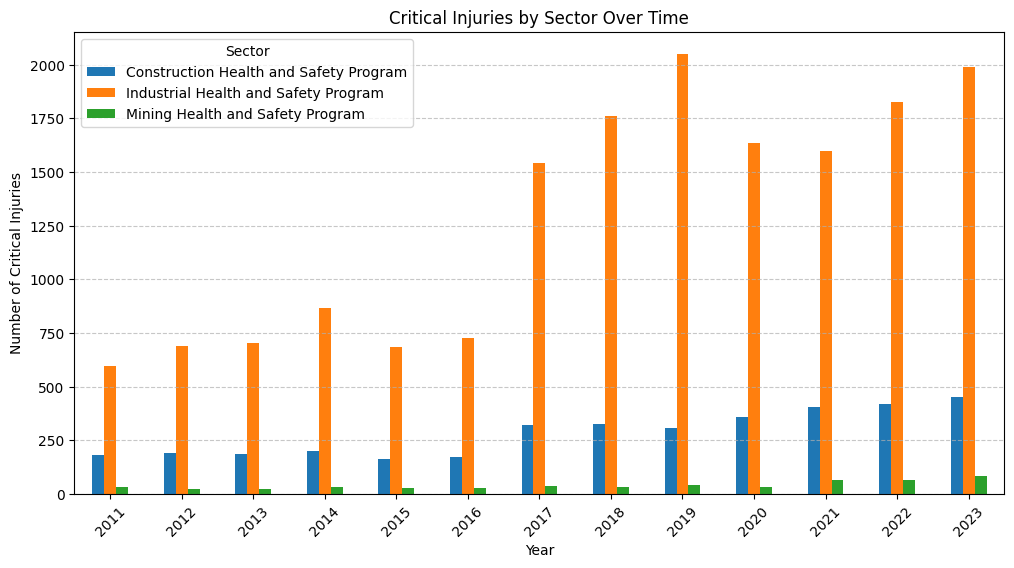

In [273]:

# Adjust column names for critical injuries dataset
critical_injuries_df.set_index("Calendar Year")[["Construction Health and Safety Program", 
                                                 "Industrial Health and Safety Program", 
                                                 "Mining Health and Safety Program"]].plot(
    kind='bar', figsize=(12, 6), stacked=False
)
plt.title("Critical Injuries by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Critical Injuries")
plt.legend(title="Sector")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The X-axis represents the years (2011 to 2023).
The Y-axis represents the number of critical injuries.

The industrial sector reports the highest number of critical injuries each year, with numbers sharply increasing from 2017 onwards.
Construction maintains a steady but significantly lower number of injuries compared to industrial.

Mining has consistently low numbers of critical injuries, suggesting either better safety protocols or fewer incidents being reported.

Stronger enforcement of safety policies in the industrial sector to prevent further increases in injuries. 


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    INSIGHTS FROM VISUALISATIONS
</div>


The highest number of fatalities occurred in the industrial sector, peaking at 44 deaths in 2022.
Fatalities in this sector remain consistently high, indicating urgent need for stricter safety regulations, compliance monitoring, and risk mitigation strategies. 

Fatalities in construction remain relatively stable, fluctuating between 13 and 25 deaths per year.
Despite no extreme spikes, the consistent occurrence of fatalities highlights ongoing risks that require improved safety training, better equipment, and stricter regulations. 

The mining sector has fewer fatalities compared to construction and industrial sectors.
However, occasional spikes suggest that continuous safety monitoring and risk assessment remain crucial.

In the health care sector, with only three recorded instances (2012, 2015, and 2021) for critical injuries, makes it difficult to establish trends, but this may indicate better workplace safety policies in the sector.

<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    STATISTICAL TEST ON CRITICAL INJURY
</div>


In [ ]:
# Shapiro -Wilk Normality Test

# Select numerical columns
columns_to_test = ["Construction", "Industrial", "Mining", "Total"]

# Perform Shapiro-Wilk test for normality
for col in columns_to_test:
    stat, p = shapiro(fatalities_df[col])
    print(f"{col} - Statistic: {stat}, p-value: {p}")

    if p > 0.05:
        print(f"{col} follows a normal distribution.\n")
    else:
        print(f"{col} does NOT follow a normal distribution.\n")


Construction - Statistic: 0.9250999032814238, p-value: 0.2936462150258893
Construction follows a normal distribution.

Industrial - Statistic: 0.882278828926909, p-value: 0.07656771939639608
Industrial follows a normal distribution.

Mining - Statistic: 0.9070570518140213, p-value: 0.16712922855657658
Mining follows a normal distribution.

Total - Statistic: 0.9557720490410253, p-value: 0.6876583015252027
Total follows a normal distribution.



In [ ]:
# Purpose: Test if there is a statistically significant difference in fatalities across different sectors.

# Perform one-way ANOVA
stat, p = f_oneway(fatalities_df["Construction"], 
                   fatalities_df["Industrial"], 
                   fatalities_df["Mining"])

print(f"ANOVA test - Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Significant difference exists in fatalities across sectors.\n")
else:
    print("No significant difference in fatalities across sectors.\n")


ANOVA test - Statistic: 147.9113372093026, p-value: 4.336466003776769e-18
Significant difference exists in fatalities across sectors.



In [ ]:
# Purpose: Check if there is a statistically significant increasing or decreasing trend in fatalities over time.

# Apply Mann-Kendall trend test on total fatalities
result = original_test(fatalities_df["Total"])
print(result)


Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0.0, Tau=0.01282051282051282, s=1.0, var_s=265.6666666666667, slope=0.0, intercept=53.0)


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    STATISTICAL TEST ON CRITICAL INJURY
</div>


In [277]:
# Normality Test (Shapiro-Wilk Test)
columns_to_test = ["Construction Health and Safety Program", "Industrial Health and Safety Program", "Mining Health and Safety Program"]
for col in columns_to_test:
    stat, p = shapiro(critical_injuries_df[col])
    print(f"{col} - Statistic: {stat}, p-value: {p}")
    if p > 0.05:
        print(f"{col} follows a normal distribution.\n")
    else:
        print(f"{col} does NOT follow a normal distribution.\n")


Construction Health and Safety Program - Statistic: 0.8747186693783189, p-value: 0.06051360183734955
Construction Health and Safety Program follows a normal distribution.

Industrial Health and Safety Program - Statistic: 0.8364386642372785, p-value: 0.019095821610296555
Industrial Health and Safety Program does NOT follow a normal distribution.

Mining Health and Safety Program - Statistic: 0.7644372743186671, p-value: 0.0026565864645731697
Mining Health and Safety Program does NOT follow a normal distribution.



NOTE:ANOVA requires normality, but since some columns are not normally distributed, we have to use the Kruskal-Wallis Test instead of ANOVA. 

In [ ]:
stat, p = kruskal(
    critical_injuries_df["Construction Health and Safety Program"],
    critical_injuries_df["Industrial Health and Safety Program"],
    critical_injuries_df["Mining Health and Safety Program"]
)

print(f"Kruskal-Wallis test - Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Significant difference exists in critical injuries across sectors.\n")
else:
    print("No significant difference in critical injuries across sectors.\n")


Kruskal-Wallis test - Statistic: 33.80342139892703, p-value: 4.567518430899174e-08
Significant difference exists in critical injuries across sectors.



For trend analysis (Mann-Kendall Test),Can be applied regardless of distribution.

In [279]:
# Trend Analysis (Mann-Kendall Test) for Total Critical Injuries
result = original_test(critical_injuries_df["Total"])
print("Mann-Kendall Trend Test for Total Critical Injuries:", result)


Mann-Kendall Trend Test for Total Critical Injuries: Mann_Kendall_Test(trend='increasing', h=True, p=0.0027949345698872197, z=2.989435492824159, Tau=0.6410256410256411, s=50.0, var_s=268.6666666666667, slope=163.4047619047619, intercept=917.5714285714287)



<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Conclusions
</div>


Conslusions drawn from the in-depth statistical examination of workplace fatalities and critical injuries across key industries, including construction, industrial, and mining sectors. 

* Using ANOVA and Kruskal-Wallis tests, I found statistically significant differences in both fatalities and critical injuries across sectors, highlighting the disproportionate risk in industrial and construction settings. 
* A Mann-Kendall Trend Test on fatalities indicated no significant trend over time, suggesting that fatality rates have remained stable despite safety interventions. 
* However, critical injuries showed a statistically significant increasing trend, reinforcing the urgent need for enhanced workplace safety measures. 

This work enhance workplace safety and performance, leveraging data analytics to generate actionable insights in occupational health research.